# Exploring upper bounds on k-mer differences based on hashes

Equiv? How long a run is the run without a hash.



In [4]:
import sourmash
import random

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

In [37]:
DNA = 'ATGC'

def generate_kmers(ksize):
    kmer = [ random.choice(DNA) for _ in range(ksize) ]
    while 1:
        random.shuffle(kmer)
        yield "".join(kmer)

In [80]:
KSIZE = 31
SCALED = 100

runlengths = []
for i in range(int(100000)):
    if i % 500 == 0:
        print('...', i)
    run = 0
    mh = sourmash.MinHash(n=0, ksize=KSIZE, scaled=SCALED)
    it = iter(generate_kmers(KSIZE))
    while not len(mh):
        kmer = next(it)
        mh.add_kmer(kmer)
        run += 1
    runlengths.append(run)

print(runlengths)

... 0
... 500
... 1000
... 1500
... 2000
... 2500
... 3000
... 3500
... 4000
... 4500
... 5000
... 5500
... 6000
... 6500
... 7000
... 7500
... 8000
... 8500
... 9000
... 9500
... 10000
... 10500
... 11000
... 11500
... 12000
... 12500
... 13000
... 13500
... 14000
... 14500
... 15000
... 15500
... 16000
... 16500
... 17000
... 17500
... 18000
... 18500
... 19000
... 19500
... 20000
... 20500
... 21000
... 21500
... 22000
... 22500
... 23000
... 23500
... 24000
... 24500
... 25000
... 25500
... 26000
... 26500
... 27000
... 27500
... 28000
... 28500
... 29000
... 29500
... 30000
... 30500
... 31000
... 31500
... 32000
... 32500
... 33000
... 33500
... 34000
... 34500
... 35000
... 35500
... 36000
... 36500
... 37000
... 37500
... 38000
... 38500
... 39000
... 39500
... 40000
... 40500
... 41000
... 41500
... 42000
... 42500
... 43000
... 43500
... 44000
... 44500
... 45000
... 45500
... 46000
... 46500
... 47000
... 47500
... 48000
... 48500
... 49000
... 49500
... 50000
... 50500
... 

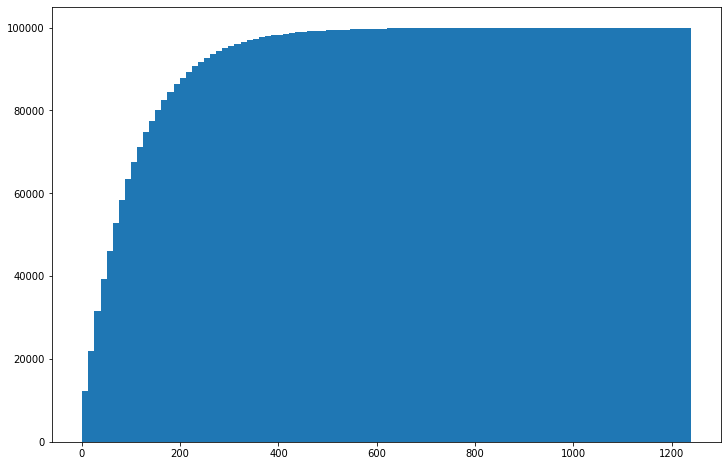

In [81]:
fig, ax = plt.subplots(figsize=(12, 8))

_ = ax.hist(runlengths, bins=100, cumulative=True)

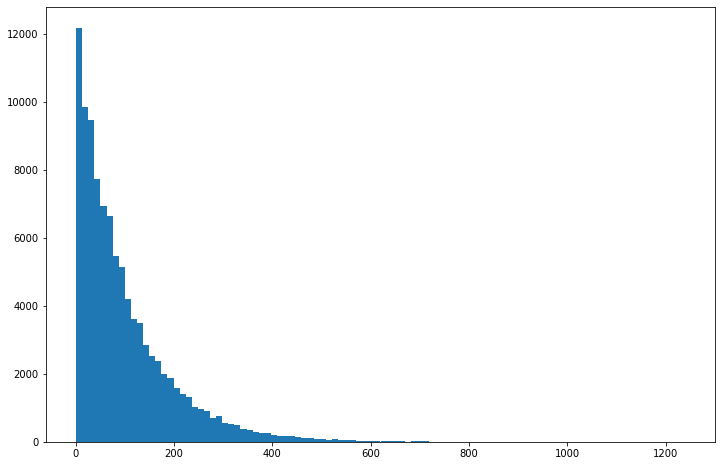

In [82]:
fig, ax = plt.subplots(figsize=(12, 8))

_ = ax.hist(runlengths, bins=100)

In [83]:
numpy.mean(runlengths)

100.32255

In [84]:
numpy.std(runlengths)

100.05102633905113

## thinking out loud

* two collections of k-mers of size N
* all hashes in common at SCALED
* what's the probability that they have no more than M different k-mers?

Intuition is that as M approaches SCALED, p <= 0.5

from poisson, as M => 5 x SCALED, p <= 0.9998 

that is, 99.98% of genomes of size N will have fewer than 5 \* SCALED k-mers different.

but... this can't be correct, this is independent of N? should it be?

yes, it only depends on SCALED? it's 1-the distribution above...

In [87]:
N_BINS = 20
n_notfound = [0] * N_BINS
for run in runlengths:
    for i in range(N_BINS):
        if run <= (i+1)*SCALED:
            n_notfound[i] += 1
            
for i in range(N_BINS):
    n_notfound[i] /= len(runlengths)

In [88]:
for i, val in enumerate(n_notfound):
    print(f"in M={(i+1) * SCALED} k-mers, p of finding at least one hash is: {val*100:.2f}% - scaled={SCALED}")

in M=100 k-mers, p of finding at least one hash is: 63.43% - scaled=100
in M=200 k-mers, p of finding at least one hash is: 86.51% - scaled=100
in M=300 k-mers, p of finding at least one hash is: 95.11% - scaled=100
in M=400 k-mers, p of finding at least one hash is: 98.18% - scaled=100
in M=500 k-mers, p of finding at least one hash is: 99.32% - scaled=100
in M=600 k-mers, p of finding at least one hash is: 99.72% - scaled=100
in M=700 k-mers, p of finding at least one hash is: 99.90% - scaled=100
in M=800 k-mers, p of finding at least one hash is: 99.96% - scaled=100
in M=900 k-mers, p of finding at least one hash is: 99.98% - scaled=100
in M=1000 k-mers, p of finding at least one hash is: 99.99% - scaled=100
in M=1100 k-mers, p of finding at least one hash is: 100.00% - scaled=100
in M=1200 k-mers, p of finding at least one hash is: 100.00% - scaled=100
in M=1300 k-mers, p of finding at least one hash is: 100.00% - scaled=100
in M=1400 k-mers, p of finding at least one hash is: 100.